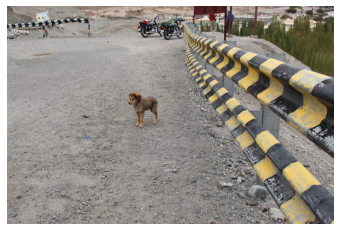

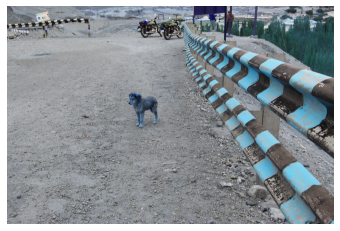

In [10]:
import cv2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf

img = mpimg.imread('/content/IMG_1543.JPG')
plt.axis("off")
imgplot = plt.imshow(img)
plt.show()

def add_brightness(image):


  image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS   
  image_HLS = np.array(image_HLS,  dtype = np.float64)     
  random_brightness_coefficient = np.random.uniform()+0.5 ## generates value between 0.5 and 1.5    
  image_HLS[:,:,1] = image_HLS[:,:,1]*random_brightness_coefficient ## scale pixel values up or down for channel 1(Lightness)    
  image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255 ##Sets all values above 255 to 255    
  image_HLS = np.array(image_HLS, dtype = np.uint8)    
  image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB)
  return image_RGB

img = cv.imread("/content/IMG_1543.JPG")

img = add_brightness(img)
plt.axis("off")

plt.imshow(img)

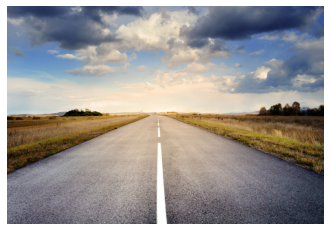

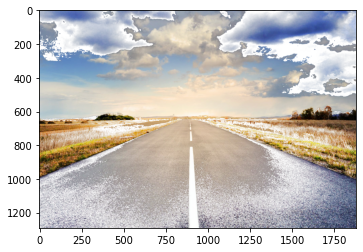

In [16]:
# make it snowy
import numpy as np

img = mpimg.imread('/content/road-asphalt-space-sky-56832.jpeg')
plt.axis("off")
imgplot = plt.imshow(img)
plt.show()

def add_snow(image):

  image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS    
  image_HLS = np.array(image_HLS, dtype = np.float64)     
  brightness_coefficient = 2.0    
  snow_point=140 ## increase this for more snow    
  image_HLS[:,:,1][image_HLS[:,:,1]<snow_point] = image_HLS[:,:,1][image_HLS[:,:,1]<snow_point]*brightness_coefficient ## scale pixel values up for channel 1(Lightness)    
  image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255 ##Sets all values above 255 to 255    
  image_HLS = np.array(image_HLS, dtype = np.uint8)    
  image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB    
  return image_RGB

  
img = mpimg.imread('/content/road-asphalt-space-sky-56832.jpeg')
img = add_snow(img)
imgplot = plt.imshow(img)
plt.show()


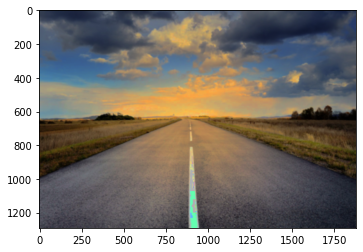

In [12]:
# make it cloudy and rainy 

def generate_random_lines(imshape,slant,drop_length):    
  drops=[]    
  for i in range(1500): ## If You want heavy rain, try increasing this        
    if slant<0:            
      x= np.random.randint(slant,imshape[1])        
    else:            
      x= np.random.randint(0,imshape[1]-slant)        
      y= np.random.randint(0,imshape[0]-drop_length)        
      drops.append((x,y))    
    return drops            
    
def add_rain(image):
  imshape = image.shape    
  slant_extreme=10    
  slant= np.random.randint(-slant_extreme,slant_extreme)     
  drop_length=20    
  drop_width=2    
  drop_color=(200,200,200) ## a shade of gray    
  rain_drops= generate_random_lines(imshape,slant,drop_length)        
  for rain_drop in rain_drops:        
    cv2.line(image,(rain_drop[0],rain_drop[1]),(rain_drop[0]+slant,rain_drop[1]+drop_length),drop_color,drop_width)    
    image= cv2.blur(image,(7,7)) ## rainy view are blurry        
    brightness_coefficient = 0.7 ## rainy days are usually shady     
    image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS    
    image_HLS[:,:,1] = image_HLS[:,:,1]*brightness_coefficient ## scale pixel values down for channel 1(Lightness)    
    image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB    
    return image_RGB

img = mpimg.imread('/content/road-asphalt-space-sky-56832.jpeg')
img = add_rain(img)
imgplot = plt.imshow(img)
plt.show()

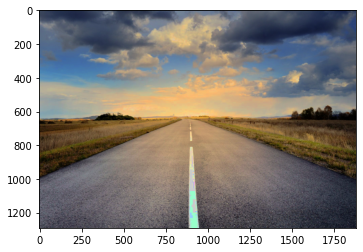

In [14]:
def add_blur(image, x,y,hw):
  image[y:y+hw, x:x+hw,1] = image[y:y+hw, x:x+hw,1]+1    
  image[:,:,1][image[:,:,1]>255]  = 255 ##Sets all values above 255 to 255    
  image[y:y+hw, x:x+hw,1] = cv2.blur(image[y:y+hw, x:x+hw,1] ,(10,10))    
  return image



def generate_random_blur_coordinates(imshape,hw):
  blur_points=[]    
  midx= imshape[1]//2-hw-100    
  midy= imshape[0]//2-hw-100    
  index=1    
  while(midx>-100 or midy>-100): ## radially generating coordinates        
    for i in range(250*index):            
      x= np.random.randint(midx,imshape[1]-midx-hw)            
      y= np.random.randint(midy,imshape[0]-midy-hw)            
      blur_points.append((x,y))        
      midx-=250*imshape[1]//sum(imshape)        
      midy-=250*imshape[0]//sum(imshape)        
      index+=1    
    return blur_points  

def add_fog(image):    
      image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS    
      mask = np.zeros_like(image)     
      imshape = image.shape    
      hw=100    
      image_HLS[:,:,1]=image_HLS[:,:,1]*0.8    
      haze_list= generate_random_blur_coordinates(imshape,hw)    
      for haze_points in haze_list:         
        image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255 ##Sets all values above 255 to 255        
        image_HLS= add_blur(image_HLS, haze_points[0],haze_points[1], hw) ## adding all shadow polygons on empty mask, single 255 denotes only red channel    
        image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB    
        return image_RGB

img = mpimg.imread('/content/road-asphalt-space-sky-56832.jpeg')
img = add_fog(img)
imgplot = plt.imshow(img)
plt.show()

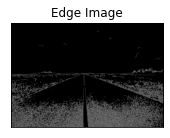

In [17]:
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/road-asphalt-space-sky-56832.jpeg')
edges = cv.Canny(img,100,200)


plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()